# WALK INTO RANDOM NUMBERS
## 1. Generating a random number

So what exactly do we mean by generating a random number ? a number whose generation is as reasonable as random chance, which basically means we dont see any pattern in generation but it does not mean that there can't exists a pattern in hindsight.In practice we see two kind of random numbers generators :
1. True Random Number generator : These uses some phyiscal phenomenon which is expected to be random, for example atmospheric noise, thermal noise etc. Mostly hardware based random numbr generator works on this principle.
2. Pseudo Random Number generator : generated numbers by this method only looks random but are in fact pre-determined. Software generated random number are basically PRNs.These use a initial value know as seed to generate a long sequence of random numbers.As a result, the entirely seemingly random sequence can be reproduce if seed value is known.
one of most common PRN is the linear congruential generator, 
$$X_{n+1} = (a X_n + b)\, \textrm{mod}\, m $$
where a, b and m are large integers, and ${\displaystyle X_{n+1}}$ is the next in X as a series of pseudorandom numbers. The maximum number of numbers the formula can produce is one less than the modulus, m-1. $X_0$ is the seed value we feed to this sequence. 
PRNGs are periodic, which means that the sequence will eventually repeat itself. While periodicity is hardly ever a desirable characteristic, modern PRNGs have a period that is so long that it can be ignored for most practical purposes.





#### Now let us programm a PRNG :

In [ ]:
import time
import matplotlib.pyplot as plt
class prandom():
  def __init__(self , mul_fac = 2345, add_fac = 3245, mod_fac = 2733879):
    self._seed = 1000*time.time()
    self.X = self._seed
    self.mul_fac = mul_fac
    self.add_fac = add_fac
    self.mod_fac = mod_fac
  
  def seed(self, value):
    self._seed = values
    self.X = value 
  
  def random(self):
    # return uniform random from [0 ,1)
    self.X = (self.mul_fac*self.X + self.add_fac)%(self.mod_fac) 
    return self.X/self.mod_fac
  
  def uniform(self, low = 0 , high = 1):
    #return uniform float from [low, high)
    return low + (high - low)*self.random()
    
  def randomInt(self, low = 0 , high = 100):
    # return uniform int from [low, high]
    return round(self.uniform(low = low-0.5 , high = high + 0.5))

Lets understand above steps,  
Looking at random function gives a clear look that its a congurence generators. and division by mod_fac while returning converge range into [0, 1)
seed functions basically sets initial X value.        

As we said earlier PSR generators are only random in forsight but actually there exists a pattern.now lets look into it in more details:   

Lets look into few experiment where we generate 1000 random number with different mod values.  

(array([500.,   0.,   0.,   0.,   0.,   0.,   0., 499.,   0.,   1.]),
 array([0.25, 0.32, 0.39, 0.46, 0.53, 0.6 , 0.67, 0.74, 0.81, 0.88, 0.95]),
 <a list of 10 Patch objects>)

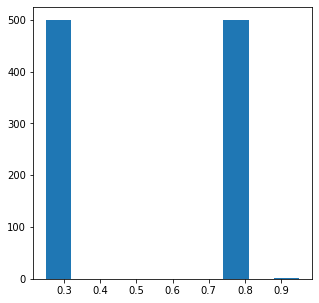

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)

pr = prandom(mod_fac=10)
ls = [pr.random() for _ in range(1000)]
plt.hist(ls)

(array([249.,   1.,   1., 250.,   0.,   0., 250.,   0.,   0., 249.]),
 array([0.075, 0.15 , 0.225, 0.3  , 0.375, 0.45 , 0.525, 0.6  , 0.675,
        0.75 , 0.825]),
 <a list of 10 Patch objects>)

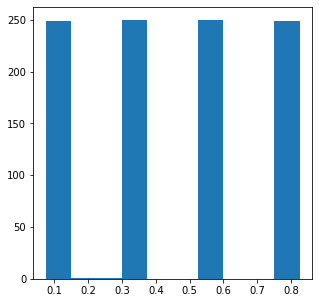

In [ ]:
pr = prandom(mod_fac=100)
ls = [pr.random() for _ in range(1000)]
plt.hist(ls)

(array([240., 160.,  60.,  40.,  60., 120., 160.,  60.,  40.,  60.]),
 array([0.01665167, 0.11188119, 0.20711071, 0.30234023, 0.39756976,
        0.49279928, 0.5880288 , 0.68325833, 0.77848785, 0.87371737,
        0.96894689]),
 <a list of 10 Patch objects>)

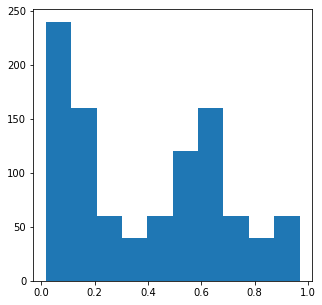

In [ ]:
pr = prandom(mod_fac=1111)
ls = [pr.random() for _ in range(1000)]
plt.hist(ls)

(array([ 95.,  95., 125., 117., 110.,  89.,  90.,  80.,  89., 110.]),
 array([8.40150084e-04, 1.00711810e-01, 2.00583470e-01, 3.00455130e-01,
        4.00326790e-01, 5.00198450e-01, 6.00070110e-01, 6.99941770e-01,
        7.99813430e-01, 8.99685090e-01, 9.99556750e-01]),
 <a list of 10 Patch objects>)

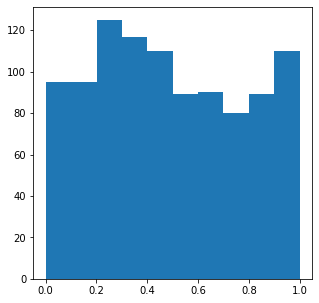

In [ ]:
pr = prandom(mod_fac=2222222)
ls = [pr.random() for _ in range(1000)]
plt.hist(ls)

Form graphs we can observe that smaller values of mod_fac, more likely we can observe that generated random numbers are following a pattern. But we want to generated number to be as random as possible, hence keeping a sufficiently large mod_fac is necessary.Also we can observe the with larger mod_fac values generated numbers are close to uniform distribution. Point to note here generating a number from uniform distrbution does not make it non random number.Randomness is defined by the fact when we cant observe a pattern to predict next number.

Lets look certain property we can design from our random generator.   
1. Uniform() generator function :
2. Radom integer generator() :   
3. 

## Generating uniformly distributed sample from a rectangle

In [ ]:
pr = prandom()
X = [pr.uniform() for _ in range(300)]
Y = [pr.uniform() for _ in range(300)]

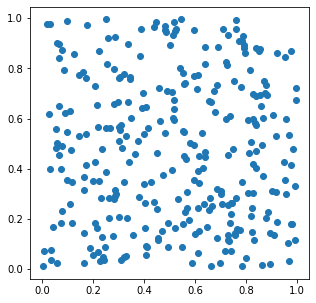

In [ ]:
plt.scatter(X, Y)

# Generating uniformly distributed samples from a circle

In [ ]:
import math
import matplotlib.pyplot as plt
pr = prandom()
def uniform_circle(radius = 1):
  x = pr.uniform(low = -1, high = 1)
  y = pr.uniform(low = -1, high = 1)
  if x*x + y*y <= 1 : return (x, y)
  return uniform_circle(radius = radius)

def uniform_circle1(radius = 1):
  r = math.sqrt(pr.uniform(low = 0, high = 1))
  theta = pr.uniform(low = 0, high = 360 )
  return r*math.cos(theta), r*math.sin(theta)


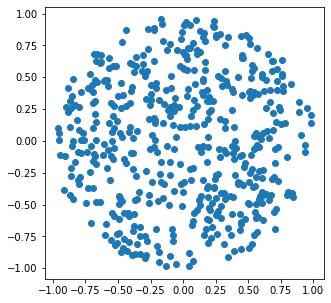

In [ ]:
circle_points = [uniform_circle1() for _ in range(500)]
X = [circle_points[i][0] for i in range(500)]
Y = [circle_points[i][1] for i in range(500)]
plt.rcParams["figure.figsize"] = (5,5)
plt.scatter(X, Y)

$$probOfSuccess = circleaArea/squareArea=\pi/4 = 0.78$$
$$probOfSuccessIn2Attempts = 1 - 0.22*0.22 = 0.95$$

generating theta : points are evenly distributed around the circle .
r ? 
current selection : each r inside circle will have on average same number of points .  
as circumference of ring grows , number of points remains constant.
resulting in outre radii have lower density then inner ones. 

probability density function : How likely it is for a given random variable x to fall inside a given interval

currently pdf is a straight line which does not work, now lets figure out how should it look like ? 

circum frenece grows linearly with radius , number of points should also grow linearly  with radius, to keep density in the circle constant. 

new pdf fx =  mr , m = ?
P(0<= X < 1) =  1
 area under curve  = 1 =>  m = 2
 
 How to modify function ?   
 CDF : F(r)  = P (X <= r)  
 F_x(r) = r*r = P(X <= r)

Question is we have a function generating values uniformly, how to modify the generated value to suit our needs.?



